# WEEK 26 : Embedded Methods / Intrinsic Method :

 LASSO and RIDGE https://www.youtube.com/watch?v=gryKjGVgzc4&list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH&index=12

https://learnwith.campusx.in/s/courses/637339afe4b0615a1bbed390/take

# Embedded Methods

- Embedded methods are feature selection techniques which perform feature selection as part
of the model construction process. They are called embedded methods because feature
selection is embedded within the construction of the machine learning model. 


- These methods
aim to solve the limitations of filter and wrapper methods by including the interactions of the
features while also being more computationally efficient.

### ML algorithms with inbuilt Embedded methods :

Any ML algorithm which has __coeff__ or __feature\_importance__ attribute :


1. __Linear Regression__


2. __Logistic Regression__


3. __Ridge,Lasso,ElasticNet (Regularization Techniques)__


4. __Tree based algorithm (eg:Decision Tree, Random Forest)__


5. __Boosting techniques__

## 1. Linear regression Feature selection: `lr.coeff_`

### Assumptions for $\beta$ (coefficients) to be reliable:

1. __Linearity :__ The relationship between the independent and dependent variables is linear. This
also means the change in the dependent variable for a unit change in the independent
variable(s) is constant.


2. __Independence :__ The observations are independent of each other. This implies that the
residuals (the differences between the observed and predicted values) are independent.


3. __Homoscedasticity :__ The variance of the residuals is constant across all levels of the
independent variables.


4. __Normality :__ The residuals are normally distributed.



5. __No Multicollinearity :__ The independent variables are not highly correlated with each other.
This assumption is really important when you want to interpret the regression coefficients.

## 2. Regularized Models

- Regularized linear models are linear models that include a penalty term in the loss function
during training. 


- The penalty term discourages the learning of a too complex model, which can
help prevent overfitting.

### Feature Selection using LASSO

In [1]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [4]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [5]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)

In [7]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

#### coefficient for each column:

In [9]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<AxesSubplot:>

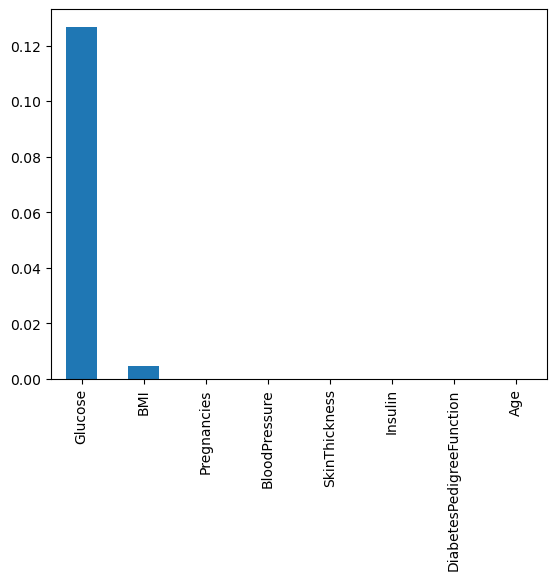

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

## 3. Tree based Embedded:

### Feature Selection using Decision Tree

In [11]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [14]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [15]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [16]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier()

#### Decision Tree feature importances :

In [19]:
dt.feature_importances_

array([0.07403117, 0.29028074, 0.09098131, 0.04286881, 0.04702533,
       0.19583981, 0.1204546 , 0.13851825])

#### Random forest feature importances :

In [18]:
rf.feature_importances_

array([0.08839127, 0.24843899, 0.09136246, 0.06958252, 0.08064474,
       0.16701357, 0.12819245, 0.126374  ])

#### Decision tree feature importance : 

<AxesSubplot:>

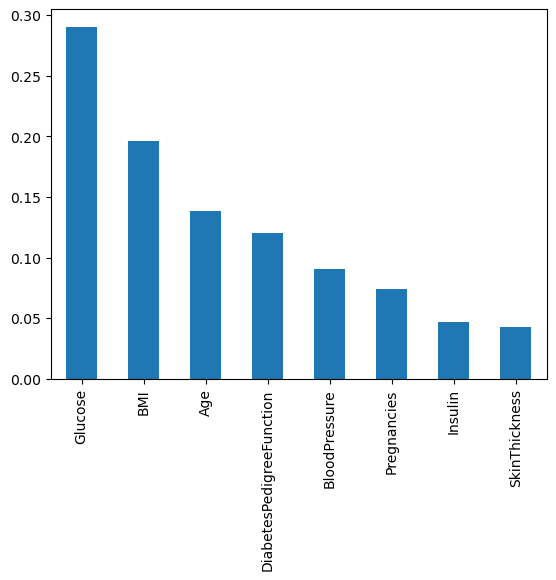

In [21]:
x = pd.Series(np.abs(dt.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

#### Random Forest feature importance : 

<AxesSubplot:>

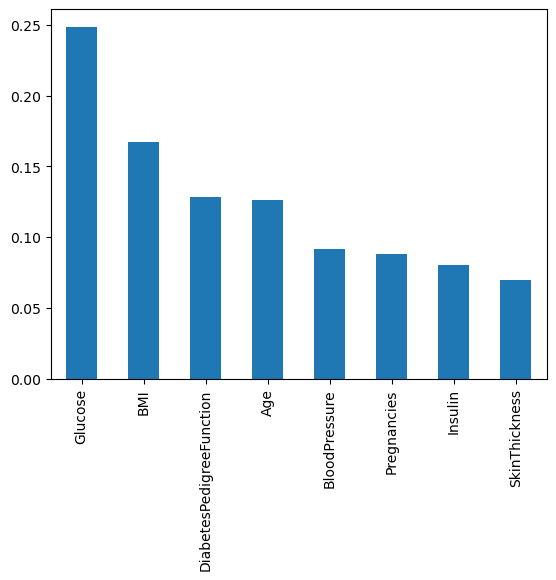

In [22]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### Transformer in sklearn : SelectFromModel used for embedded methods 

`sklearn.feature_selection.SelectFromModel`

> Meta-transformer for selecting features based on importance weights.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [23]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

#### importing transformer:

In [25]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold='mean') 

# threhold is mean i.e feature importance scores should be compared with the mean value of the scores.
# Any feature with an importance score greater than the mean will be selected, 
# while features with importance scores lower than the mean will be ignored or removed.

In [26]:
sfm.fit(X_train, y_train) 

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [27]:
sfm.get_support(indices=True)

array([1, 5, 7], dtype=int64)

In [28]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [29]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans


,Glucose,BMI,Age
0,145.0,37.9,40.0
1,129.0,41.2,38.0
2,102.0,37.2,45.0
3,120.0,25.0,64.0
4,120.0,39.7,29.0
...,...,...,...
609,157.0,39.4,30.0
610,187.0,33.9,34.0
611,126.0,43.4,42.0
612,171.0,43.6,26.0


---
---

## Advantages and Disadvantages of Embedded Method : 

### Advantages:
1. __Performance :__ They are generally more accurate than filter methods since they take the
interactions between features into account.


2. __Efficiency :__ They are more computationally efficient than wrapper methods since they fit
the model only once.


3. __Less Prone to Overfitting :__ They introduce some form of regularization, which helps to
avoid overfitting. For example, Lasso and Ridge regression add a penalty to the loss
function, shrinking some coefficients to zero.


### Disadvantages:
1. __Model Specific :__ Biggest issue, Since they are tied to a specific machine learning model, the selected
features are not necessarily optimal for other models.


2. __Complexity :__ They can be more complex and harder to interpret than filter methods. For
example, understanding why Lasso shrinks some coefficients to zero and not others can
be non-trivial.


3. __Tuning Required :__ They often have hyperparameters that need to be tuned, like the
regularization strength in Lasso and Ridge regression.


4. __Stability :__ Depending on the model and the data, small changes in the data can result in
different sets of selected features. This is especially true for models that can fit complex
decision boundaries, like decision trees.

## Cheatsheet when to use which Embedded method:

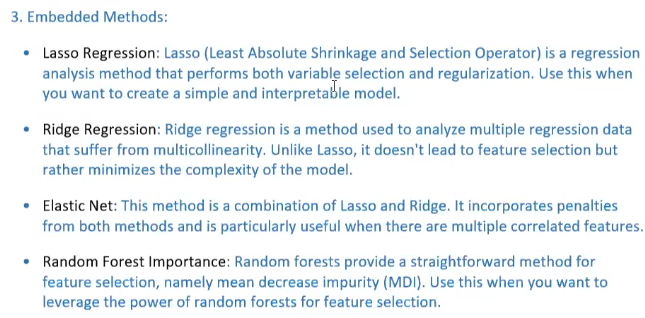